# Project: Insurance Policy Cancellation (CC)
---------------------------------------------

**Dr. Dave Wanik - OPIM 5502: Big Data Analytics using Cloud Computing - University of Connecticut**

*This dataset comes from the 2022 NESS Statathon (Theme 1) from 2022. An archived version of the website and related data has been posted on HuskyCT.*

**Challenge:** Using historical policy data, create a multiclass predictive model to predict the policies that are most likely to be canceled and those most likely to be renewed, as well as understand what variables are most influential in causing a policy cancellation.

For this theme, there are true answers, and a team should focus on proposing the best predictive model. The performance of a team will be mainly based on the predictive performance of the propose method measured by accuracy and the quality of the code. You can use Python's weighted F1 score to calculate the performance of for your model on the test partition.
  * Make sure you use the 'weighted' F1 score
    * https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html

# Dataset Description
The Kangaroo data set is based on 4 years of property insurance policies from 2013 to 2017. There are roughly 1 million policies in the training data and each policy only has one observation. There were almost 230,000 policies canceled during the effective term. Your work is to build a model on the training data and use your best model to predict the cancelation indicator for each policy in test data.

Variable descriptions
* id - Policy id (cannot be used in model)
* tenure - Number of years with Kangaroo
* claim.ind - Occurrence of claim (0=no, 1=yes)
* n.adults - Number of adults in the property
* n.children - Number of children in the property
* ni.gender - Gender of policyholder
* ni.marital.status - Marital status of policyholder (0=no, 1=yes)
* premium - Price of the policy
* sales.channel - Medium through which policy was purchased
* coverage.type - Type of coverage
* dwelling.type - Type of dwelling
* len.at.res - Length at residence (how long policyholder lived at property)
* credit - Financial credit level of policyholder
* house.color - Color of house
* ni.age - Age of policholder
* year - Year of the policy
* zip.code - Zip code of the property
* cancel - cancelation indicator (0=not cancel, 1=may cancel but can be convinced, 2=cancel). **This is the response variable.** Dave is deleting the rows where `cancel==-1`!

The train and test files have also been made available to students for modeling on HuskyCT.

In [ ]:
# train
!gdown 1OwtVLopkeGxWMEYkzhFM1-C5hyNnnY39

Downloading...
From: https://drive.google.com/uc?id=1OwtVLopkeGxWMEYkzhFM1-C5hyNnnY39
To: /content/train_df_simple.csv
100% 11.2M/11.2M [00:00<00:00, 92.9MB/s]


In [ ]:
# test
!gdown 1DE_CgigN94XO7ESp1ip0t4Mc2on0r_Rj

Downloading...
From: https://drive.google.com/uc?id=1DE_CgigN94XO7ESp1ip0t4Mc2on0r_Rj
To: /content/test_df.csv
100% 32.2M/32.2M [00:00<00:00, 70.3MB/s]


# Install Spark
Simpler is better!

In [ ]:
!pip install pyspark

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 310.8/310.8 MB 2.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.4.0-py2.py3-none-any.whl size=311317145 sha256=f9660223c28dfb8e72712baecc6a7101601d5b41cb8eb749e0f39668ce800b9b
  Stored in directory: /root/.cache/pip/wheels/7b/1b/4b/3363a1d04368e7ff0d408e57ff57966fcdf00583774e761327
Successfully built pyspark


# Start session

We start the builder pattern `SparkSession.builder` and then chain a configuration parameter that defined the application name.

Providing a useful `appName` helps you identify which programs are running on your Spark cluster.

In [ ]:
from pyspark.sql import SparkSession
spark = SparkSession.builder\
        .appName("ML_pipelines")\
        .getOrCreate()

# Some dependencies

In [ ]:
# our usual pyspark friends
from pyspark.sql.utils import AnalysisException
import pyspark.sql.functions as F
import pyspark.sql.types as T
from functools import reduce

In [ ]:
# pandas and sklearn
import pandas as pd
import sklearn

# Rubric
The submitted notebook will serve as both a form of model documentation and business communication - there should be lots of text cells and comments and a nice presentation of your work!

🟥 You may use your own local environment, Colab or Databricks to do your modeling, but you must submit your final .ipynb file for grading!

🟥 I expect most of this notebook to be completed with PySpark code with limited `toPandas()` statements - the one exception to this is your model evaluation section where you can convert to pandas so that you can use `sklearn` classification report and confusion matrix if you would like to.

## EDA, data cleaning and feature engineering (20 points)
* `X_train`, `X_test`, `y_train`, and `y_test` has been provided to all students.
  * Any team who does not do this automatically goes into last place - more below!
* Explore the data and clean it up as you see fit - make sure you `fit_transform()` on the training data and `transform()` on the test data.
  * Any team that has data leakage automatically goes into last place!
* Make five meaningful plots and five meaningful tables (most be deeper than simpler univariate plots - we want you to really explore the problem at hand and use this information to make a better model!)
* It is up to you whether or not you want to curate the training dataset to get a better fit on the test dataset (for example, if you would like to use some sampling strategy like oversampling, that's great - just remember that you DON'T change the distribution of the target variable in the test partition.)

## Modeling (20 points)
* You may perform your modeling in a different notebook (to be submitted as an appendix), but you must run your final and BEST model here and all output must be displayed.
  * It's up to you to decide what the best pre-processing steps should be!

## Model Results (20 points)
* Classification report and confusion report for train and test partition.
  * You may use cross-validation to help pick the optimal hyperparameters for your model.
* Even though this was for text analytics, I thought it was still very well-done, it could be a good resource for you:
  * https://ashokpalivela.medium.com/multi-class-text-classification-using-spark-ml-in-python-b8d2a6545cb

## Interpretability and Discussion (30 points)
Remember - we want to know what is driving cancellations! It's not enough to build an amazing model, you have to inspect it and explain how it made its decision.

* If your best model is a logistic regression, print the coefficients and interpret them!
  * Check the textbook and class materials for a nice example.
* If your best model is a tree-based model, you can get the importances from the PySpark models!
  * https://spark.apache.org/docs/latest/api/python/reference/api/pyspark.ml.classification.DecisionTreeClassifier.html
  * https://spark.apache.org/docs/latest/api/python/reference/api/pyspark.ml.classification.RandomForestClassificationModel.html#pyspark.ml.classification.RandomForestClassificationModel.featureImportances
* If you used a different model than a logistic regression or tree-based model, it's up to you to determine to best show how your model made its decision. On your own, you may want to consider partial dependence (ask Dave for help early if you want to do this):
  * https://gist.github.com/eddjberry/43ceca3d29905781ab6c8dab07e8e1da
*  Use your model results and interpretability items to present what variables are most influential in causing a policy cancellation.
  * We are looking for each team to provide a business recommendation based on the results of your model! We will take off substantial points if there is not a well-written and cohesive presentation of results.

## Conclusions (10 points)
* Write five meaningful bullets (each bullet should be at least two sentences long) describing what you learned.

## 🛷 Sliding grading scale
* You are in direct competition with every other group in the class!
* I expect everything in this notebook to be of sufficient quality - well-organized with lots of comments and cleaned up nice for presentation to management. I will deduct substantial points if this is just my code copy/pasted without any deep analysis.
* Your 'starting grades' will range from an 80 to a 100 based on model F1 score for the TEST PARTITION (you can use the `F1 score` function from sci-kit learn to evaluate the final model.)
* Of course, if something is missing from the above rubric, we will deduct points from your starting grade.
  * If you came in first place and lost 10 points somewhere, your final grade is 100 - 10 = 90
  * If you came in last place (for accuracy) and lost 10 points somewhere, your final grade is 80 - 10 = 70.


# EDA, data cleaning and feature engineering

In [ ]:
train = spark.read.csv(
    '/content/train_df_simple.csv', inferSchema=True, header=True
)
test = spark.read.csv(
    '/content/test_df.csv', inferSchema=True, header=True
)

X_train = train.drop("cancel")
y_train = train.select("cancel")

X_test = test.drop("cancel")
y_test = test.select("cancel")

In [ ]:
# schema
X_train.printSchema()

root
 |-- id: integer (nullable = true)
 |-- year: integer (nullable = true)
 |-- zip.code: double (nullable = true)
 |-- house.color: string (nullable = true)
 |-- ni.age: double (nullable = true)
 |-- len.at.res: double (nullable = true)
 |-- credit: string (nullable = true)
 |-- coverage.type: string (nullable = true)
 |-- dwelling.type: string (nullable = true)
 |-- premium: double (nullable = true)
 |-- sales.channel: string (nullable = true)
 |-- ni.gender: string (nullable = true)
 |-- ni.marital.status: double (nullable = true)
 |-- n.adults: double (nullable = true)
 |-- n.children: double (nullable = true)
 |-- tenure: double (nullable = true)
 |-- claim.ind: double (nullable = true)



In [ ]:
# shape of train:
print("Number of rows:",X_train.count())
print("Number of columns:",len(X_train.columns))

Number of rows: 120000
Number of columns: 17


In [ ]:
# show data
X_train.show(5, False)

+------+----+--------+-----------+------+----------+------+-------------+-------------+-----------------+-------------+---------+-----------------+--------+----------+------+---------+
|id    |year|zip.code|house.color|ni.age|len.at.res|credit|coverage.type|dwelling.type|premium          |sales.channel|ni.gender|ni.marital.status|n.adults|n.children|tenure|claim.ind|
+------+----+--------+-----------+------+----------+------+-------------+-------------+-----------------+-------------+---------+-----------------+--------+----------+------+---------+
|688609|2016|50001.0 |white      |44.0  |25.0      |high  |A            |Condo        |950.7386189      |Broker       |F        |1.0              |3.0     |0.0       |17.0  |0.0      |
|308155|2015|50048.0 |yellow     |31.0  |22.0      |high  |B            |Tenant       |1003.420558      |Broker       |M        |0.0              |2.0     |0.0       |8.0   |1.0      |
|240486|2015|98034.0 |white      |39.0  |17.0      |low   |C            |Ho

We decided to tweak the column names that have '.' in it. This can be problematic when calling the columns.

In [ ]:
# change '.' to '_' in column names:
X_train = X_train.toDF(*[name.replace(".", "_") for name in X_train.columns])
X_test = X_test.toDF(*[name.replace(".", "_") for name in X_test.columns])

In [ ]:
X_train.show(1)

+------+----+--------+-----------+------+----------+------+-------------+-------------+-----------+-------------+---------+-----------------+--------+----------+------+---------+
|    id|year|zip_code|house_color|ni_age|len_at_res|credit|coverage_type|dwelling_type|    premium|sales_channel|ni_gender|ni_marital_status|n_adults|n_children|tenure|claim_ind|
+------+----+--------+-----------+------+----------+------+-------------+-------------+-----------+-------------+---------+-----------------+--------+----------+------+---------+
|688609|2016| 50001.0|      white|  44.0|      25.0|  high|            A|        Condo|950.7386189|       Broker|        F|              1.0|     3.0|       0.0|  17.0|      0.0|
+------+----+--------+-----------+------+----------+------+-------------+-------------+-----------+-------------+---------+-----------------+--------+----------+------+---------+
only showing top 1 row



## Data Cleaning

In [ ]:
X_train = X_train.withColumn('id', F.monotonically_increasing_id())
X_test = X_test.withColumn('id', F.monotonically_increasing_id())

In [ ]:
y_train = y_train.withColumn('id_y', F.monotonically_increasing_id())
y_test = y_test.withColumn('id_y', F.monotonically_increasing_id())

In [ ]:
X_train = X_train.join(y_train, y_train.id_y == X_train.id, how = 'inner')
X_test = X_test.join(y_test, y_test.id_y == X_test.id, how = 'inner')

I had to perform what was done above in order to be able to drop rows with null values while at the same time dropping these rows in y_train and y_test, as well (or else we can't train the model). This also required changing the ids for the X dataset but it should not matter, as long as we don't join X_train with y_test for some reason.

let us explore and change categorical features first:
* `year`- ordinally encode
* `zipcode`- should be dropped if too many values
* `house_color`- one-hot or drop
* `ni_age`- bucketize or convert to ind > mean
* `credit`- ordinally encode
* `coverage_type`- one-hot
* `dwelling_type`- one-hot
* `sales_channel`- one-hot
* `ni_gender`- encode (0/1)
* `ni_marital_status`
* `claim_ind`

### `year`

In [ ]:
# count values in year column
X_train.groupBy('year').count().orderBy('count').show()

+----+-----+
|year|count|
+----+-----+
|2013|25254|
|2014|28546|
|2015|31554|
|2016|34646|
+----+-----+



In [ ]:
# import string indexer
from pyspark.ml.feature import StringIndexer

# convert year to string first
X_train = X_train.withColumn("year", X_train.year.cast('string'))
X_test = X_test.withColumn("year", X_test.year.cast('string'))

indexer = StringIndexer(inputCol = 'year', outputCol = 'year_encoded')
X_train = indexer.fit(X_train).transform(X_train)
X_test = indexer.fit(X_test).transform(X_test)
X_train.select('year', 'year_encoded').show()

+----+------------+
|year|year_encoded|
+----+------------+
|2016|         0.0|
|2015|         1.0|
|2015|         1.0|
|2013|         3.0|
|2013|         3.0|
|2015|         1.0|
|2015|         1.0|
|2015|         1.0|
|2015|         1.0|
|2015|         1.0|
|2014|         2.0|
|2016|         0.0|
|2016|         0.0|
|2013|         3.0|
|2014|         2.0|
|2015|         1.0|
|2014|         2.0|
|2015|         1.0|
|2016|         0.0|
|2016|         0.0|
+----+------------+
only showing top 20 rows



### `zip_code`

In [ ]:
# let's see how many zipcodes there are
# if there are too many, it should be dropped since it serves no purpose as a continuous feature
# and will make the dataset too complex for the model as a categorical feature
X_train.groupBy('zip_code').count().orderBy('count').show()

+--------+-----+
|zip_code|count|
+--------+-----+
| 20108.0|   51|
| 20116.0|   56|
| 20128.0|   63|
| 20117.0|   65|
| 20121.0|   66|
| 20115.0|   66|
| 20122.0|   67|
| 20142.0|   70|
| 20124.0|   71|
| 20118.0|   72|
| 20146.0|   77|
| 20144.0|   77|
| 20158.0|   77|
| 20164.0|   77|
| 20155.0|   78|
| 20107.0|   78|
| 20130.0|   80|
| 20138.0|   81|
| 20141.0|   82|
| 20147.0|   82|
+--------+-----+
only showing top 20 rows



In [ ]:
# far too many, we will drop it from x
X_train = X_train.drop('zip_code')
X_test = X_test.drop('zip_code')

### `house_color`

In [ ]:
# how many house colors are there
X_train.groupBy('house_color').count().orderBy('count').show()

+-----------+-----+
|house_color|count|
+-----------+-----+
|       null|  109|
|     yellow|10901|
|        red|30106|
|       blue|33310|
|      white|45574|
+-----------+-----+



In [ ]:
# There are only four house colors, so it may be reasonable to one-hot encode these.
# However, there are rows where the color is null. We should drop these rows so the encoder does not get confused.
X_train = X_train.na.drop(subset = ['house_color'])
X_test = X_test.na.drop(subset = ['house_color'])

In [ ]:
# now we can one-hot encode:
from pyspark.ml.feature import OneHotEncoder

# must index categories first
indexer = StringIndexer(inputCol = 'house_color', outputCol = 'house_color_ind')
one = OneHotEncoder(inputCol = 'house_color_ind', outputCol = 'house_color_enc')

X_train = indexer.fit(X_train).transform(X_train)
X_test = indexer.fit(X_test).transform(X_test)
X_train = one.fit(X_train).transform(X_train)
X_test = one.fit(X_test).transform(X_test)

In [ ]:
X_train.show()

+---+----+-----------+------+----------+------+-------------+-------------+-----------------+-------------+---------+-----------------+--------+----------+------+---------+------+----+------------+---------------+---------------+
| id|year|house_color|ni_age|len_at_res|credit|coverage_type|dwelling_type|          premium|sales_channel|ni_gender|ni_marital_status|n_adults|n_children|tenure|claim_ind|cancel|id_y|year_encoded|house_color_ind|house_color_enc|
+---+----+-----------+------+----------+------+-------------+-------------+-----------------+-------------+---------+-----------------+--------+----------+------+---------+------+----+------------+---------------+---------------+
|  0|2016|      white|  44.0|      25.0|  high|            A|        Condo|      950.7386189|       Broker|        F|              1.0|     3.0|       0.0|  17.0|      0.0|     0|   0|         0.0|            0.0|  (3,[0],[1.0])|
|  1|2015|     yellow|  31.0|      22.0|  high|            B|       Tenant|     

In [ ]:
# ['house_color_white', 'house_color_blue', 'house_color_red']
X_train = X_train.drop('house_color')
X_train = X_train.drop('house_color_ind')
X_test = X_test.drop('house_color')
X_test = X_test.drop('house_color_ind')

### `ni_age` @@

In [ ]:
# Let us see how this feature is distributed in order to determine how we can format it
#import seaborn as sns

# drop nan values, there are 708 (too little to affect dataset)
#X_train = X_train.na.drop(subset = ['ni_age'])
#X_test = X_test.na.drop(subset = ['ni_age'])

#ni_age_dist = X_train.select('ni_age').toPandas()

<Axes: ylabel='Count'>

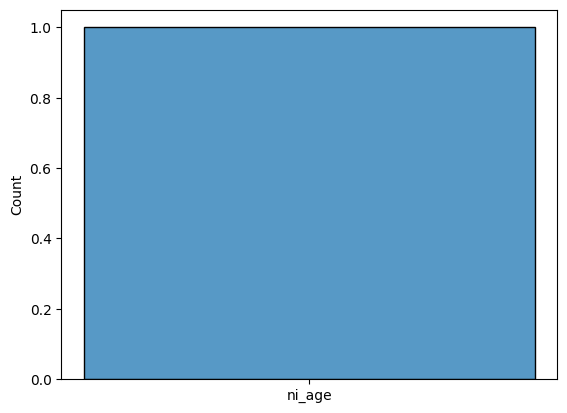

In [ ]:
import seaborn as sns
sns.histplot(data = "ni_age")

Clearly there is no reason for policy holders to be more than 100 years old. We should remove these values.

In [ ]:
# udf = F.UserDefinedFunction(lambda x: )

X_train = X_train.where(F.col("ni_age") <= 100)
X_test = X_test.where(F.col("ni_age") <= 100)

<Axes: ylabel='Count'>

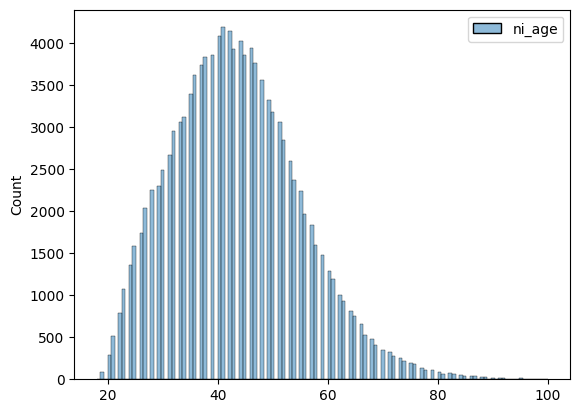

In [ ]:
# plot again
ni_age_dist = X_train.select('ni_age').toPandas()

sns.histplot(data = ni_age_dist)

WE will now impute the missing values with average of age

In [ ]:
sum = X_train.select(F.sum(F.col('ni_age')).alias('sum')).show()
count = X_train.select(F.count(F.col('ni_age')).alias('count')).show()

+-----------------+
|              sum|
+-----------------+
|5198526.678989081|
+-----------------+

+------+
| count|
+------+
|119661|
+------+



In [ ]:
avg= 5198526.678989081/119661
print(avg)

43.44378434902834


In [ ]:
X_train= X_train.fillna(43.44, subset='ni_age')

In [ ]:
sum = X_test.select(F.sum(F.col('ni_age')).alias('sum')).show()
count = X_test.select(F.count(F.col('ni_age')).alias('count')).show()

+-------------------+
|                sum|
+-------------------+
|1.495256645751464E7|
+-------------------+

+------+
| count|
+------+
|343997|
+------+



In [ ]:
avg= 1.495256645751464E7/343997
print(avg)

43.467142031804464


In [ ]:
X_test= X_test.fillna(43.44, subset='ni_age')

Much more normal distribution!

### `credit`

In [ ]:
# ordinally encoding this
X_train.groupBy('credit').count().orderBy('count').show()

+------+-----+
|credit|count|
+------+-----+
|  null|  101|
|   low|19438|
|medium|26148|
|  high|73974|
+------+-----+



In [ ]:
# drop null values:
X_train = X_train.na.drop(subset = ['credit'])
X_test = X_test.na.drop(subset = ['credit'])

In [ ]:
# encode with logic since this order is hierarchical (high should be 2, low should be 0)

X_train = X_train.withColumn("credit", F.when(F.col("credit") == 'low', 0)\
                                       .when(F.col('credit') == 'medium', 1)
                                       .otherwise(2))
X_test = X_test.withColumn("credit", F.when(F.col("credit") == 'low', 0)\
                                       .when(F.col('credit') == 'medium', 1)
                                       .otherwise(2))

X_train.select('credit').show()

+------+
|credit|
+------+
|     2|
|     2|
|     0|
|     2|
|     1|
|     2|
|     2|
|     1|
|     2|
|     2|
|     2|
|     2|
|     0|
|     1|
|     0|
|     2|
|     0|
|     1|
|     1|
|     2|
+------+
only showing top 20 rows



### `coverage_type`

In [ ]:
X_train.groupBy('coverage_type').count().orderBy('count').show()

+-------------+-----+
|coverage_type|count|
+-------------+-----+
|         null|  137|
|            B|28343|
|            A|40799|
|            C|50281|
+-------------+-----+



In [ ]:
# remove null values to not confuse indexer/encoder

X_train = X_train.na.drop(subset=['coverage_type'])
X_test = X_test.na.drop(subset=['coverage_type'])

In [ ]:
# we are going to one-hot encode this column
indexer = StringIndexer(inputCol = 'coverage_type', outputCol = 'coverage_type_ind')
one = OneHotEncoder(inputCol = 'coverage_type_ind', outputCol = 'coverage_type_enc')

X_train = indexer.fit(X_train).transform(X_train)
X_test = indexer.fit(X_test).transform(X_test)
X_train = one.fit(X_train).transform(X_train)
X_test = one.fit(X_test).transform(X_test)

In [ ]:
X_train.show()

+---+----+------+----------+------+-------------+-------------+-----------------+-------------+---------+-----------------+--------+----------+------+---------+------+----+------------+---------------+-----------------+-----------------+
| id|year|ni_age|len_at_res|credit|coverage_type|dwelling_type|          premium|sales_channel|ni_gender|ni_marital_status|n_adults|n_children|tenure|claim_ind|cancel|id_y|year_encoded|house_color_enc|coverage_type_ind|coverage_type_enc|
+---+----+------+----------+------+-------------+-------------+-----------------+-------------+---------+-----------------+--------+----------+------+---------+------+----+------------+---------------+-----------------+-----------------+
|  0|2016|  44.0|      25.0|     2|            A|        Condo|      950.7386189|       Broker|        F|              1.0|     3.0|       0.0|  17.0|      0.0|     0|   0|         0.0|  (3,[0],[1.0])|              1.0|    (2,[1],[1.0])|
|  1|2015|  31.0|      22.0|     2|            B

In [ ]:
# ['coverage_A', 'coverage_B']
X_train = X_train.drop('coverage_type')
X_train = X_train.drop('coverage_type_ind')
X_test = X_test.drop('coverage_type')
X_test = X_test.drop('coverage_type_ind')

### `dwelling_type`

In [ ]:
X_train.groupBy('dwelling_type').count().orderBy('count').show()

+-------------+-----+
|dwelling_type|count|
+-------------+-----+
|         null|  127|
|       Tenant|23715|
|        Condo|28605|
|        House|66976|
+-------------+-----+



In [ ]:
# remove null values to not confuse indexer/encoder

X_train = X_train.na.drop(subset=['dwelling_type'])
X_test = X_test.na.drop(subset=['dwelling_type'])

In [ ]:
# we are going to one-hot encode this column
indexer = StringIndexer(inputCol = 'dwelling_type', outputCol = 'dwelling_type_ind')
one = OneHotEncoder(inputCol = 'dwelling_type_ind', outputCol = 'dwelling_type_enc')

X_train = indexer.fit(X_train).transform(X_train)
X_test = indexer.fit(X_test).transform(X_test)
X_train = one.fit(X_train).transform(X_train)
X_test = one.fit(X_test).transform(X_test)

In [ ]:
X_train.show()

+---+----+------+----------+------+-------------+-----------------+-------------+---------+-----------------+--------+----------+------+---------+------+----+------------+---------------+-----------------+-----------------+-----------------+
| id|year|ni_age|len_at_res|credit|dwelling_type|          premium|sales_channel|ni_gender|ni_marital_status|n_adults|n_children|tenure|claim_ind|cancel|id_y|year_encoded|house_color_enc|coverage_type_enc|dwelling_type_ind|dwelling_type_enc|
+---+----+------+----------+------+-------------+-----------------+-------------+---------+-----------------+--------+----------+------+---------+------+----+------------+---------------+-----------------+-----------------+-----------------+
|  0|2016|  44.0|      25.0|     2|        Condo|      950.7386189|       Broker|        F|              1.0|     3.0|       0.0|  17.0|      0.0|     0|   0|         0.0|  (3,[0],[1.0])|    (2,[1],[1.0])|              1.0|    (2,[1],[1.0])|
|  1|2015|  31.0|      22.0|    

In [ ]:
# ['dwelling_house', 'dwelling_condo']
X_train = X_train.drop('dwelling_type')
X_train = X_train.drop('dwelling_type_ind')
X_test = X_test.drop('dwelling_type')
X_test = X_test.drop('dwelling_type_ind')

In [ ]:
n

### `sales_channel`

In [ ]:
X_train.groupBy('sales_channel').count().orderBy('count').show()

+-------------+-----+
|sales_channel|count|
+-------------+-----+
|         null|  118|
|       Online|10152|
|        Phone|39828|
|       Broker|69198|
+-------------+-----+



In [ ]:
# remove null values to not confuse indexer/encoder

X_train = X_train.na.drop(subset=['sales_channel'])
X_test = X_test.na.drop(subset=['sales_channel'])

In [ ]:
# we are going to one-hot encode this column
indexer = StringIndexer(inputCol = 'sales_channel', outputCol = 'sales_channel_ind')
one = OneHotEncoder(inputCol = 'sales_channel_ind', outputCol = 'sales_channel_enc')

X_train = indexer.fit(X_train).transform(X_train)
X_test = indexer.fit(X_test).transform(X_test)
X_train = one.fit(X_train).transform(X_train)
X_test = one.fit(X_test).transform(X_test)

In [ ]:
X_train.show()

+---+----+------+----------+------+-----------------+-------------+---------+-----------------+--------+----------+------+---------+------+----+------------+---------------+-----------------+-----------------+-----------------+-----------------+
| id|year|ni_age|len_at_res|credit|          premium|sales_channel|ni_gender|ni_marital_status|n_adults|n_children|tenure|claim_ind|cancel|id_y|year_encoded|house_color_enc|coverage_type_enc|dwelling_type_enc|sales_channel_ind|sales_channel_enc|
+---+----+------+----------+------+-----------------+-------------+---------+-----------------+--------+----------+------+---------+------+----+------------+---------------+-----------------+-----------------+-----------------+-----------------+
|  0|2016|  44.0|      25.0|     2|      950.7386189|       Broker|        F|              1.0|     3.0|       0.0|  17.0|      0.0|     0|   0|         0.0|  (3,[0],[1.0])|    (2,[1],[1.0])|    (2,[1],[1.0])|              0.0|    (2,[0],[1.0])|
|  1|2015|  31.0

In [ ]:
# ['sales_broker', 'sales_phone']
X_train = X_train.drop('sales_channel_ind')
X_train = X_train.drop('sales_channel')
X_test = X_test.drop('sales_channel_ind')
X_test = X_test.drop('sales_channel')

### `ni_gender`

In [ ]:
X_train.groupBy('ni_gender').count().orderBy('count').show()

+---------+-----+
|ni_gender|count|
+---------+-----+
|     null|  123|
|        F|57138|
|        M|61917|
+---------+-----+



In [ ]:
# remove null values to not confuse indexer/encoder

X_train = X_train.na.drop(subset=['ni_gender'])
X_test = X_test.na.drop(subset=['ni_gender'])

In [ ]:
# conditionally replace M and F with 0 and 1 respectively

X_train = X_train.withColumn('ni_gender', F.when(F.col('ni_gender') == 'M', 0)\
                             .otherwise(1))
X_test = X_test.withColumn('ni_gender', F.when(F.col('ni_gender') == 'M', 0)\
                             .otherwise(1))

### `ni_marital_status`

In [ ]:
X_train.groupBy('ni_marital_status').count().orderBy('count').show()

+-----------------+-----+
|ni_marital_status|count|
+-----------------+-----+
|             null|  117|
|              0.0|34747|
|              1.0|84191|
+-----------------+-----+



In [ ]:
# simply clean this up

X_train = X_train.na.drop(subset=['ni_marital_status'])
X_test = X_test.na.drop(subset=['ni_marital_status'])

### `claim_ind`

In [ ]:
X_train.groupBy('claim_ind').count().orderBy('count').show()

+---------+-----+
|claim_ind|count|
+---------+-----+
|     null|  126|
|      1.0|23669|
|      0.0|95143|
+---------+-----+



In [ ]:
# simply clean this up

X_train = X_train.na.drop(subset=['claim_ind'])
X_test = X_test.na.drop(subset=['claim_ind'])

### Clean the rest

In [ ]:
# Let's see what other null values there are

X_train.select([F.count(F.when(F.col(c).isNull(), c
                           )).alias(c)
                    for c in X_train.columns]).show()

+---+----+------+----------+------+-------+---------+-----------------+--------+----------+------+---------+------+----+------------+---------------+-----------------+-----------------+-----------------+
| id|year|ni_age|len_at_res|credit|premium|ni_gender|ni_marital_status|n_adults|n_children|tenure|claim_ind|cancel|id_y|year_encoded|house_color_enc|coverage_type_enc|dwelling_type_enc|sales_channel_enc|
+---+----+------+----------+------+-------+---------+-----------------+--------+----------+------+---------+------+----+------------+---------------+-----------------+-----------------+-----------------+
|  0|   0|     0|       112|     0|    100|        0|                0|      92|        95|   123|        0|     0|   0|           0|              0|                0|                0|                0|
+---+----+------+----------+------+-------+---------+-----------------+--------+----------+------+---------+------+----+------------+---------------+-----------------+-----------------

There are not too many na values, let's drop them all. They are in the following columns:
* `len_at_res`
* `premium`
* `n_adults`
* `n_children`
* `tenure`

In [ ]:
X_train = X_train.na.drop(subset=['len_at_res', 'premium', 'n_adults', 'n_children', 'tenure'])
X_test = X_test.na.drop(subset=['len_at_res', 'premium', 'n_adults', 'n_children', 'tenure'])

In [ ]:
X_train.select([F.count(F.when(F.col(c).isNull(), c
                           )).alias(c)
                    for c in X_train.columns]).show()

+---+----+------+----------+------+-------+---------+-----------------+--------+----------+------+---------+------+----+------------+---------------+-----------------+-----------------+-----------------+
| id|year|ni_age|len_at_res|credit|premium|ni_gender|ni_marital_status|n_adults|n_children|tenure|claim_ind|cancel|id_y|year_encoded|house_color_enc|coverage_type_enc|dwelling_type_enc|sales_channel_enc|
+---+----+------+----------+------+-------+---------+-----------------+--------+----------+------+---------+------+----+------------+---------------+-----------------+-----------------+-----------------+
|  0|   0|     0|         0|     0|      0|        0|                0|       0|         0|     0|        0|     0|   0|           0|              0|                0|                0|                0|
+---+----+------+----------+------+-------+---------+-----------------+--------+----------+------+---------+------+----+------------+---------------+-----------------+-----------------

In [ ]:
X_test.select([F.count(F.when(F.col(c).isNull(), c
                           )).alias(c)
                    for c in X_train.columns]).show()

+---+----+------+----------+------+-------+---------+-----------------+--------+----------+------+---------+------+----+------------+---------------+-----------------+-----------------+-----------------+
| id|year|ni_age|len_at_res|credit|premium|ni_gender|ni_marital_status|n_adults|n_children|tenure|claim_ind|cancel|id_y|year_encoded|house_color_enc|coverage_type_enc|dwelling_type_enc|sales_channel_enc|
+---+----+------+----------+------+-------+---------+-----------------+--------+----------+------+---------+------+----+------------+---------------+-----------------+-----------------+-----------------+
|  0|   0|     0|         0|     0|      0|        0|                0|       0|         0|     0|        0|     0|   0|           0|              0|                0|                0|                0|
+---+----+------+----------+------+-------+---------+-----------------+--------+----------+------+---------+------+----+------------+---------------+-----------------+-----------------

In [ ]:
# Here is the whole dataset as-is:
X_train.show(5, False)

+---+----+------+----------+------+-----------------+---------+-----------------+--------+----------+------+---------+------+----+------------+---------------+-----------------+-----------------+-----------------+
|id |year|ni_age|len_at_res|credit|premium          |ni_gender|ni_marital_status|n_adults|n_children|tenure|claim_ind|cancel|id_y|year_encoded|house_color_enc|coverage_type_enc|dwelling_type_enc|sales_channel_enc|
+---+----+------+----------+------+-----------------+---------+-----------------+--------+----------+------+---------+------+----+------------+---------------+-----------------+-----------------+-----------------+
|0  |2016|44.0  |25.0      |2     |950.7386189      |1        |1.0              |3.0     |0.0       |17.0  |0.0      |0     |0   |0.0         |(3,[0],[1.0])  |(2,[1],[1.0])    |(2,[1],[1.0])    |(2,[0],[1.0])    |
|1  |2015|31.0  |22.0      |2     |1003.420558      |0        |0.0              |2.0     |0.0       |8.0   |1.0      |0     |1   |1.0         |(

At this point, we were going to redefine y_train and y_test, but we have a great opportunity to see relationships between features and the target variable.

## Data Exploration

In [ ]:
X_train.printSchema()

root
 |-- id: long (nullable = false)
 |-- year: string (nullable = true)
 |-- ni_age: double (nullable = false)
 |-- len_at_res: double (nullable = true)
 |-- credit: integer (nullable = false)
 |-- premium: double (nullable = true)
 |-- ni_gender: integer (nullable = false)
 |-- ni_marital_status: double (nullable = true)
 |-- n_adults: double (nullable = true)
 |-- n_children: double (nullable = true)
 |-- tenure: double (nullable = true)
 |-- claim_ind: double (nullable = true)
 |-- cancel: integer (nullable = true)
 |-- id_y: long (nullable = false)
 |-- year_encoded: double (nullable = false)
 |-- house_color_enc: vector (nullable = true)
 |-- coverage_type_enc: vector (nullable = true)
 |-- dwelling_type_enc: vector (nullable = true)
 |-- sales_channel_enc: vector (nullable = true)



In [ ]:
# Turn all features into one vector
target_column = ['cancel']

FEATURES = ['ni_age',
            'len_at_res',
            'credit',
#           'premium',
#           'ni_gender',
#           'ni_marital_status',
            'n_adults',
            'n_children',
#           'tenure',
            'claim_ind',
            'year_encoded',
#           'house_color_enc',
            'coverage_type_enc',
            'dwelling_type_enc',
            'sales_channel_enc']

FEATURES_analysis = ['ni_age',
                    'len_at_res',
                    'credit',
#                   'premium',
#                   'ni_gender',
#                   'ni_marital_status',
                    'n_adults',
                    'n_children',
#                   'tenure',
                    'claim_ind',
                    'year_encoded',
#                   'house_color_enc',
                    'coverage_type_enc',
                    'dwelling_type_enc',
                    'sales_channel_enc',
                    'cancel']

Because house color and gender were considered to be almost not correlated at all to cancellation status in previous iterations, they were not added to the vector.

Next, dwelling type was also removed because these were very correlated with age but barely influence cancellation type.

Finally, ni_marital_status was removed because it is highly correlated with n_children, so they seem to tell the same information. Also, tenure was removed because it is highly correlated with ni_age.

In [ ]:
# create vector
from pyspark.ml.feature import VectorAssembler

# all features vectorized (including cancel, for analysis purposes)
vass = VectorAssembler(inputCols = FEATURES_analysis, outputCol = 'features')

In [ ]:
analysis_set = vass.transform(X_train)

In [ ]:
analysis_set.show(5, False)

+---+----+------+----------+------+-----------------+---------+-----------------+--------+----------+------+---------+------+----+------------+---------------+-----------------+-----------------+-----------------+------------------------------------------------------------+
|id |year|ni_age|len_at_res|credit|premium          |ni_gender|ni_marital_status|n_adults|n_children|tenure|claim_ind|cancel|id_y|year_encoded|house_color_enc|coverage_type_enc|dwelling_type_enc|sales_channel_enc|features                                                    |
+---+----+------+----------+------+-----------------+---------+-----------------+--------+----------+------+---------+------+----+------------+---------------+-----------------+-----------------+-----------------+------------------------------------------------------------+
|0  |2016|44.0  |25.0      |2     |950.7386189      |1        |1.0              |3.0     |0.0       |17.0  |0.0      |0     |0   |0.0         |(3,[0],[1.0])  |(2,[1],[1.0])   

### Correlation Matrix

In [ ]:
# import corr
from pyspark.ml.stat import Correlation

correlation = Correlation.corr(analysis_set, "features")

In [ ]:
# get the correlation matrix and make it an array
# the use of head conveniently grabs the first
correlation_array = correlation.head()[0].toArray()

# this effectively flattened the matrix into an array
print(correlation_array)

[[ 1.00000000e+00 -6.36940326e-04  7.99025851e-02 -6.06246637e-03
   9.10012800e-02  3.29129008e-03  5.47711660e-05 -3.09755142e-03
  -2.15146074e-03  2.65878670e-01 -1.49920904e-01  6.51575032e-02
   2.69097258e-02 -1.05035600e-01]
 [-6.36940326e-04  1.00000000e+00 -1.36258159e-03 -4.03499551e-03
   3.46181265e-03 -4.49601817e-03  4.16778370e-03  9.60732453e-05
   2.10183377e-03 -1.73964254e-03 -2.70762151e-03  3.51100130e-04
   2.45008619e-03 -3.92371941e-02]
 [ 7.99025851e-02 -1.36258159e-03  1.00000000e+00  5.31754403e-03
   4.72253038e-03  3.03440554e-03  4.38838455e-03 -2.83921720e-03
   1.91752241e-03  7.17989546e-03 -3.92993603e-03  1.50359784e-02
   4.43823521e-03 -2.43519788e-01]
 [-6.06246637e-03 -4.03499551e-03  5.31754403e-03  1.00000000e+00
  -1.38665174e-03  1.58108648e-03  2.72208381e-03  2.24797959e-03
  -3.65395131e-03  8.23546041e-04 -8.99287480e-04  3.00313991e-03
  -6.41713193e-04  4.04340019e-02]
 [ 9.10012800e-02  3.46181265e-03  4.72253038e-03 -1.38665174e-03
  

In [ ]:
# reformat for one-hot encoding
feature_columns = ['ni_age',
                  'len_at_res',
                  'credit',
                  # 'ni_marital_status',
                  'n_adults',
                  'n_children',
                  # 'tenure',
                  'claim_ind',
                  'year_encoded',
                  'coverage_A',
                  'coverage_B',
                  'dwelling_house',
                  'dwelling_condo',
                  'sales_broker',
                  'sales_phone',
                  'cancel']

In [ ]:
correlation_pd = pd.DataFrame(correlation_array,index=feature_columns, columns=feature_columns,)

In [ ]:
correlation_pd

,ni_age,len_at_res,credit,n_adults,n_children,claim_ind,year_encoded,coverage_A,coverage_B,dwelling_house,dwelling_condo,sales_broker,sales_phone,cancel
ni_age,1.000000,-0.000637,0.079903,-0.006062,0.091001,0.003291,0.000055,-0.003098,-0.002151,0.265879,-0.149921,0.065158,0.026910,-0.105036
len_at_res,-0.000637,1.000000,-0.001363,-0.004035,0.003462,-0.004496,0.004168,0.000096,0.002102,-0.001740,-0.002708,0.000351,0.002450,-0.039237
credit,0.079903,-0.001363,1.000000,0.005318,0.004723,0.003034,0.004388,-0.002839,0.001918,0.007180,-0.003930,0.015036,0.004438,-0.243520
n_adults,-0.006062,-0.004035,0.005318,1.000000,-0.001387,0.001581,0.002722,0.002248,-0.003654,0.000824,-0.000899,0.003003,-0.000642,0.040434
n_children,0.091001,0.003462,0.004723,-0.001387,1.000000,0.003820,0.000535,-0.005398,0.000042,0.021106,-0.013665,0.007688,0.000996,0.090884
claim_ind,0.003291,-0.004496,0.003034,0.001581,0.003820,1.000000,0.002553,0.003024,0.003380,0.004264,-0.001759,-0.001020,-0.000506,0.066437
year_encoded,0.000055,0.004168,0.004388,0.002722,0.000535,0.002553,1.000000,0.001406,-0.000957,-0.008915,0.007693,-0.000839,0.000960,0.019426
coverage_A,-0.003098,0.000096,-0.002839,0.002248,-0.005398,0.003024,0.001406,1.000000,-0.614177,-0.001750,-0.000793,-0.003266,0.001573,0.020845
coverage_B,-0.002151,0.002102,0.001918,-0.003654,0.000042,0.003380,-0.000957,-0.614177,1.000000,0.001440,0.000785,0.001394,-0.003162,-0.022144
dwelling_house,0.265879,-0.001740,0.007180,0.000824,0.021106,0.004264,-0.008915,-0.001750,0.001440,1.000000,-0.635274,0.011633,0.003002,-0.033367


This is not a great way to see these, let us visualize this!

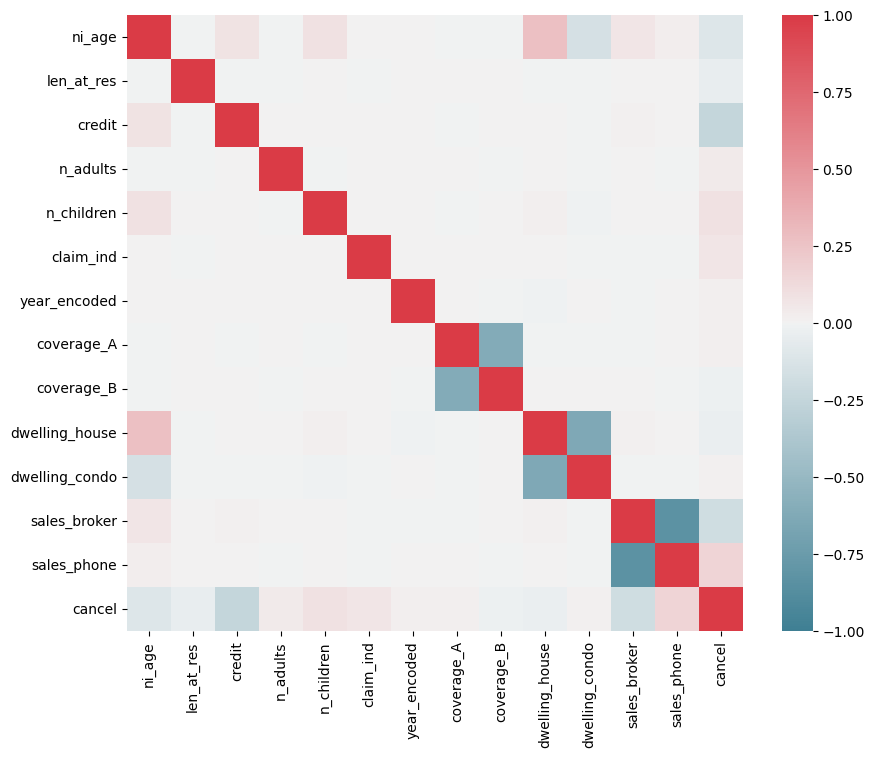

In [ ]:
import matplotlib.pyplot as plt

f, ax = plt.subplots(figsize=(10, 8))
corr = correlation_pd # use pd dataframe for column names
sns.heatmap(correlation_pd,
    cmap=sns.diverging_palette(220, 10, as_cmap=True),
    vmin=-1.0, vmax=1.0,
    square=True, ax=ax)
plt.show()

As seen above, there are a few interesting relationships:
* Individuals are more willing to cancel when handling the policy with a sales broker, but less willing to cancel with a sales phone call.
* Individuals with higher credit scores are slightly more willing to cancel.
* Individuals that are older have dwell in condos more than houses. In addition, the younger the individual is, the lower tenure in their dwelling (makes sense). Finally, younger individuals have lower credit scores.
* Individuals with condos may have higher tenures.
* Policy claims have less lieklihood of cancellation
* Gender does not impact any of these features much.
* Older individuals may cancel policies moreso than younger individuals.
* House color and gender have a very low influence on cancellation.

All in all, it is good to see that overall, many of these features don't impact eachother much because it can help with our model's performance.

### Cancellation per Broker Type

First we should convert the vector to a dataframe:

In [ ]:
# converts vector to a dataframe
vector_df = analysis_set.rdd.map(lambda x:[float(y) for y in x['features']]).toDF(feature_columns)

In [ ]:
vector_df.show(5, False)

+------+----------+------+--------+----------+---------+------------+----------+----------+--------------+--------------+------------+-----------+------+
|ni_age|len_at_res|credit|n_adults|n_children|claim_ind|year_encoded|coverage_A|coverage_B|dwelling_house|dwelling_condo|sales_broker|sales_phone|cancel|
+------+----------+------+--------+----------+---------+------------+----------+----------+--------------+--------------+------------+-----------+------+
|44.0  |25.0      |2.0   |3.0     |0.0       |0.0      |0.0         |0.0       |1.0       |0.0           |1.0           |1.0         |0.0        |0.0   |
|31.0  |22.0      |2.0   |2.0     |0.0       |1.0      |1.0         |0.0       |0.0       |0.0           |0.0           |1.0         |0.0        |0.0   |
|39.0  |17.0      |0.0   |3.0     |0.0       |0.0      |1.0         |1.0       |0.0       |1.0           |0.0           |0.0         |1.0        |0.0   |
|37.0  |22.0      |2.0   |1.0     |2.0       |0.0      |3.0         |0.0    

Now we can query:

In [ ]:
query = vector_df.select('sales_broker', 'sales_phone', 'cancel')
query.createOrReplaceTempView("data")

In [ ]:
df = spark.sql('SELECT cancel, SUM(sales_broker) AS Sales_Broker, SUM(sales_phone) AS Phone_Sale, \
                SUM(CASE WHEN sales_broker == 0 AND sales_phone == 0 \
                      THEN 1 \
                      END) AS Online \
                FROM data \
                GROUP BY cancel').toPandas()
df

,cancel,Sales_Broker,Phone_Sale,Online
0,0.0,53951.0,23768.0,6171
1,1.0,3419.0,4100.0,991
2,2.0,11340.0,11642.0,2908


Above we can see a table that represents how sales brokers are the best as securing policies, especially seeing how sales brokers have the same amount of cancellations as sales phone calls, but sales brokers have the highest amount of policies.

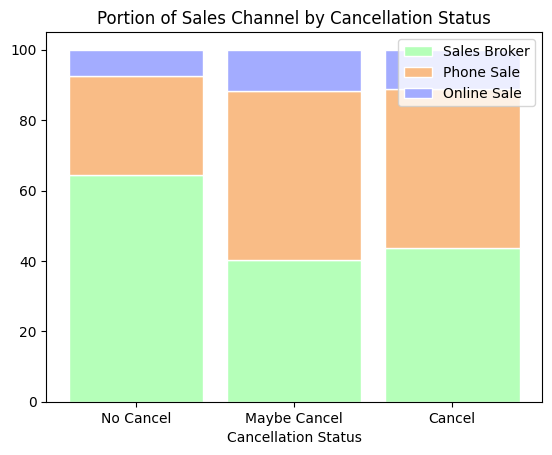

In [ ]:
# From raw value to percentage
totals = [i+j+k for i,j,k in zip(df['Sales_Broker'], df['Phone_Sale'], df['Online'])]
sales_broker = [i / j * 100 for i,j in zip(df['Sales_Broker'], totals)]
phone_sale = [i / j * 100 for i,j in zip(df['Phone_Sale'], totals)]
online = [i / j * 100 for i,j in zip(df['Online'], totals)]

# plot
barWidth = 0.85
names = ('No Cancel', 'Maybe Cancel', 'Cancel')
# Create sales broker
plt.bar(df['cancel'], sales_broker, color='#b5ffb9', edgecolor='white', width=barWidth, label = 'Sales Broker')
# Create phone sale
plt.bar(df['cancel'], phone_sale, bottom=sales_broker, color='#f9bc86', edgecolor='white', width=barWidth, label = 'Phone Sale')
# Create online
plt.bar(df['cancel'], online, bottom=[i+j for i,j in zip(sales_broker, phone_sale)], color='#a3acff', edgecolor='white', width=barWidth, label = 'Online Sale')

# Custom x axis
plt.xticks(df['cancel'], names)
plt.xlabel("Cancellation Status")

# Add a legend, title
plt.legend(loc='upper right', bbox_to_anchor=(1,1), ncol=1)
plt.title("Portion of Sales Channel by Cancellation Status")

# Show graphic
plt.show()

As seen above, the sales channel that leads to the highest proportion of secured policies is the Sales Broker. Although it is easy to see that it takes up the majority of all policies through the previous table, it holds up well. This easily contrasts with the proportion of cancellation statuses for Phone Sales, which have difficulty securing policies but seem to lead to cancellations or the possibility thereof the most. Finally, policies purchased through online sales channels seem to share a similar fate to that of policies sold by phone.

### Cancellation per Credit Score

In [ ]:
query = vector_df.select('credit', 'cancel')
query.createOrReplaceTempView("data")

In [ ]:
df = spark.sql('SELECT cancel, \
                SUM(CASE WHEN credit==2 THEN 1 END) AS High_Credit, \
                SUM(CASE WHEN credit==1 THEN 1 END) AS Medium_Credit, \
                SUM(CASE WHEN credit==0 THEN 1 END) AS Low_Credit \
                FROM data \
                GROUP BY cancel').toPandas()
df

,cancel,High_Credit,Medium_Credit,Low_Credit
0,0.0,57898,16623,9369
1,1.0,3508,2837,2165
2,2.0,11745,6414,7731


As seen above, individuals with high credit have a proportionately to the values 0 as well as 2.

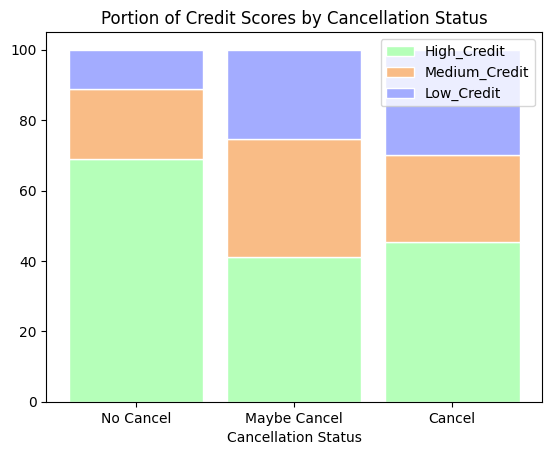

In [ ]:
# From raw value to percentage
totals = [i+j+k for i,j,k in zip(df['High_Credit'], df['Medium_Credit'], df['Low_Credit'])]
High_Credit = [i / j * 100 for i,j in zip(df['High_Credit'], totals)]
Medium_Credit = [i / j * 100 for i,j in zip(df['Medium_Credit'], totals)]
Low_Credit = [i / j * 100 for i,j in zip(df['Low_Credit'], totals)]

# plot
barWidth = 0.85
names = ('No Cancel', 'Maybe Cancel', 'Cancel')
# Create sales broker
plt.bar(df['cancel'], High_Credit, color='#b5ffb9', edgecolor='white', width=barWidth, label = 'High_Credit')
# Create phone sale
plt.bar(df['cancel'], Medium_Credit, bottom=High_Credit, color='#f9bc86', edgecolor='white', width=barWidth, label = 'Medium_Credit')
# Create online
plt.bar(df['cancel'], Low_Credit, bottom=[i+j for i,j in zip(High_Credit, Medium_Credit)], color='#a3acff', edgecolor='white', width=barWidth, label = 'Low_Credit')

# Custom x axis
plt.xticks(df['cancel'], names)
plt.xlabel("Cancellation Status")

# Add a legend, title
plt.legend(loc='upper right', bbox_to_anchor=(1,1), ncol=1)
plt.title("Portion of Credit Scores by Cancellation Status")

# Show graphic
plt.show()

As you can see, the proportion of individuals with high credit is very large for policies without cancellations, and goes down along the cancellation process. Individuals with medium credit, however, have very variable proportions for each cancellation phase. Finally, the proportion Low credit individuals with policies goes up throughout the cancellation process, but it is not completely inverse to individuals with high credit scores.

### CreditScore by age

In [ ]:
query = vector_df.select('cancel', 'credit', 'ni_age')
query.createOrReplaceTempView("data")

In [ ]:
df_high = spark.sql('SELECT ni_age \
                FROM data \
                WHERE credit == 2').toPandas()
df_med = spark.sql('SELECT ni_age \
                FROM data \
                WHERE credit == 1').toPandas()
df_low = spark.sql('SELECT ni_age \
                FROM data \
                WHERE credit == 0').toPandas()

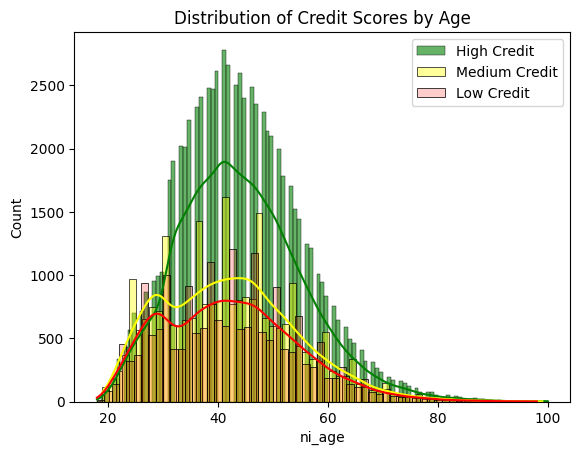

In [ ]:
sns.histplot(data=df_high, x="ni_age", color="green", label="High Credit", kde=True, alpha = 0.6, )
sns.histplot(data=df_med, x="ni_age", color="yellow", label="Medium Credit", kde=True, alpha = 0.4, )
sns.histplot(data=df_low, x="ni_age", color="red", label="Low Credit", kde=True, alpha = 0.2, )

plt.title("Distribution of Credit Scores by Age")
plt.legend()
plt.show()

This plot is important, since in the previous plot we got to identify the proportion of cancellations of policies by credit score of the individual. With this plot, we can see the distribution of individuals' credit scores by age. We can see that in the dataset, high credit scores are very prevalent. A very important insight is that there is a drop off of high credit score individuals from 30 to 20 years old. This can start to build the case that individuals under 30 should be targetted the least, since they are likely to cancel their policies according to their relationship.

### Dwelling Type by Age

In [ ]:
query = vector_df.select('cancel', 'dwelling_house', 'dwelling_condo', 'ni_age')
query.createOrReplaceTempView("data")

In [ ]:
df_house = spark.sql('SELECT ni_age \
                FROM data \
                WHERE dwelling_house == 1').toPandas()
df_condo = spark.sql('SELECT ni_age \
                FROM data \
                WHERE dwelling_condo == 1').toPandas()
df_tenant = spark.sql('SELECT ni_age \
                FROM data \
                WHERE dwelling_condo == 0 AND dwelling_house == 0').toPandas()

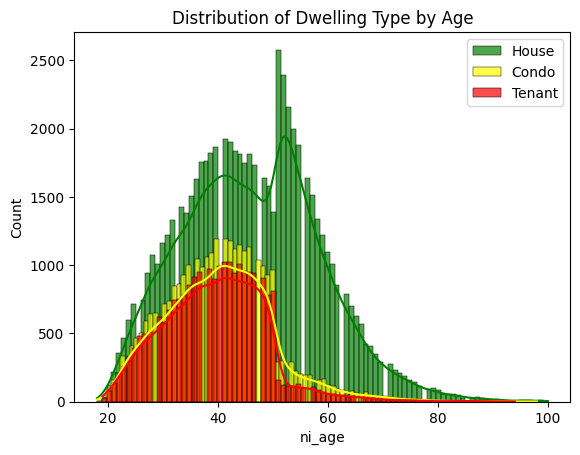

In [ ]:
sns.histplot(data=df_house, x="ni_age", color="green", label="House", kde=True, alpha = 0.7)
sns.histplot(data=df_condo, x="ni_age", color="yellow", label="Condo", kde=True, alpha = 0.7)
sns.histplot(data=df_tenant, x="ni_age", color="red", label="Tenant", kde=True, alpha = 0.7)

plt.title("Distribution of Dwelling Type by Age")
plt.legend()
plt.show()

As you can see above, and keeping in mind the relation between age and credit, it is important to note the gigantic dropoff in condo and tenant status after age 50 and the huge increase in house dwellings. This may have implications for these individuals' credit score and general financial security.

## Resetting Variables for Modeling

In [ ]:
# create vector
from pyspark.ml.feature import VectorAssembler

# all features vectorized (including cancel, for analysis purposes)
vass = VectorAssembler(inputCols = FEATURES, outputCol = 'model_features')

In [ ]:
# These contain target features by the way
train = vass.transform(X_train)
test = vass.transform(X_test)

In [ ]:
train.show(5, False)

+---+----+------+----------+------+-----------------+---------+-----------------+--------+----------+------+---------+------+----+------------+---------------+-----------------+-----------------+-----------------+-------------------------------------------------------+
|id |year|ni_age|len_at_res|credit|premium          |ni_gender|ni_marital_status|n_adults|n_children|tenure|claim_ind|cancel|id_y|year_encoded|house_color_enc|coverage_type_enc|dwelling_type_enc|sales_channel_enc|model_features                                         |
+---+----+------+----------+------+-----------------+---------+-----------------+--------+----------+------+---------+------+----+------------+---------------+-----------------+-----------------+-----------------+-------------------------------------------------------+
|0  |2016|44.0  |25.0      |2     |950.7386189      |1        |1.0              |3.0     |0.0       |17.0  |0.0      |0     |0   |0.0         |(3,[0],[1.0])  |(2,[1],[1.0])    |(2,[1],[1.0])

In [ ]:
test.show(5, False)

+---+----+------+----------+------+-----------+---------+-----------------+--------+----------+------+---------+------+----+------------+---------------+-----------------+-----------------+-----------------+-------------------------------------------------------+
|id |year|ni_age|len_at_res|credit|premium    |ni_gender|ni_marital_status|n_adults|n_children|tenure|claim_ind|cancel|id_y|year_encoded|house_color_enc|coverage_type_enc|dwelling_type_enc|sales_channel_enc|model_features                                         |
+---+----+------+----------+------+-----------+---------+-----------------+--------+----------+------+---------+------+----+------------+---------------+-----------------+-----------------+-----------------+-------------------------------------------------------+
|0  |2013|33.0  |16.0      |2     |796.385532 |1        |1.0              |1.0     |3.0       |2.0   |1.0      |0     |0   |3.0         |(3,[0],[1.0])  |(2,[0],[1.0])    |(2,[0],[1.0])    |(2,[0],[1.0])    |[

In [ ]:
import pyspark.ml.feature as MF
# minmax standardization
continuous_scaler = MF.MinMaxScaler(
inputCol="model_features",
outputCol="model_features_scaled",
)

In [ ]:
# fit and apply scaler
scaler = continuous_scaler.fit(train)
train = scaler.transform(train)
test = scaler.transform(test)

In [ ]:
train.printSchema()

root
 |-- id: long (nullable = false)
 |-- year: string (nullable = true)
 |-- ni_age: double (nullable = false)
 |-- len_at_res: double (nullable = true)
 |-- credit: integer (nullable = false)
 |-- premium: double (nullable = true)
 |-- ni_gender: integer (nullable = false)
 |-- ni_marital_status: double (nullable = true)
 |-- n_adults: double (nullable = true)
 |-- n_children: double (nullable = true)
 |-- tenure: double (nullable = true)
 |-- claim_ind: double (nullable = true)
 |-- cancel: integer (nullable = true)
 |-- id_y: long (nullable = false)
 |-- year_encoded: double (nullable = false)
 |-- house_color_enc: vector (nullable = true)
 |-- coverage_type_enc: vector (nullable = true)
 |-- dwelling_type_enc: vector (nullable = true)
 |-- sales_channel_enc: vector (nullable = true)
 |-- model_features: vector (nullable = true)
 |-- model_features_scaled: vector (nullable = true)



In [ ]:
train.show(5, False)

+---+----+------+----------+------+-----------------+---------+-----------------+--------+----------+------+---------+------+----+------------+---------------+-----------------+-----------------+-----------------+-------------------------------------------------------+----------------------------------------------------------------------------------------------------------------+
|id |year|ni_age|len_at_res|credit|premium          |ni_gender|ni_marital_status|n_adults|n_children|tenure|claim_ind|cancel|id_y|year_encoded|house_color_enc|coverage_type_enc|dwelling_type_enc|sales_channel_enc|model_features                                         |model_features_scaled                                                                                           |
+---+----+------+----------+------+-----------------+---------+-----------------+--------+----------+------+---------+------+----+------------+---------------+-----------------+-----------------+-----------------+---------------------

# Modeling

In [ ]:
# Import RandomForestClassifier
from pyspark.ml.classification import RandomForestClassifier

In [ ]:
# Create model

#clf = RandomForestClassifier(featuresCol='model_features_scaled', labelCol='cancel', predictionCol='rfPreds',
                            #maxMemoryInMB = 2048, maxDepth = 12, maxBins = 64,
                            #bootstrap = True, numTrees = 50)

# have to set this param outside of parenthesis for some reason
#clf.setThresholds([3, 1, 2])

In [ ]:

#CONTINUOUS_COLUMNS = ['year', "ni_age", "len_at_res", "credit_OHE", "coverage_type_OHE", "sales_channel_OHE", "n_adults", "n_children", "tenure", "claim_ind", "cancel" ]


#new_train_df = train.select('year', "ni_age", "len_at_res", "credit_OHE", "coverage_type_OHE", "sales_channel_OHE", "n_adults", "n_children", "tenure", "claim_ind", "cancel" )


#continuous_features = VectorAssembler(inputCols=CONTINUOUS_COLUMNS, outputCol="continuous_features")

In [ ]:
rfc = RandomForestClassifier(bootstrap = True,featuresCol='model_features_scaled', labelCol='cancel', predictionCol='cancelprediction', maxMemoryInMB = 3000, maxDepth = 10, maxBins = 96,numTrees = 50)
rfc.setThresholds([3, 1, 2])
rfcmod = rfc.fit(train)

In [ ]:
# fit model

#model = rfcmod.fit(train)

# make predictions

train_results = rfcmod.transform(train)
test_results = rfcmod.transform(test)

# Model Results

In [ ]:
# import necessary functions
from sklearn.metrics import confusion_matrix, classification_report

## Train

In [ ]:
# turn results to pandas

tmp = train_results.select('cancel', 'cancelprediction')

tmp = tmp.toPandas()

In [ ]:
# First a confusion matrix!

pd.DataFrame(confusion_matrix(tmp['cancel'], tmp['cancelprediction'], labels = [0, 1, 2]))

,0,1,2
0,73828,4560,5502
1,5017,2968,525
2,15391,2672,7827


In [ ]:
# Next a classification report!

print(classification_report(tmp['cancel'], tmp['cancelprediction'], target_names = ['0', '1', '2']))

              precision    recall  f1-score   support

           0       0.78      0.88      0.83     83890
           1       0.29      0.35      0.32      8510
           2       0.56      0.30      0.39     25890

    accuracy                           0.72    118290
   macro avg       0.55      0.51      0.51    118290
weighted avg       0.70      0.72      0.70    118290



## Test

In [ ]:
# turn results to pandas

tmp = test_results.select('cancel', 'cancelprediction')

tmp = tmp.toPandas()

In [ ]:
# First a confusion matrix!

pd.DataFrame(confusion_matrix(tmp['cancel'], tmp['cancelprediction'], labels = [0, 1, 2]))

,0,1,2
0,209383,14041,17665
1,16011,6508,1950
2,45778,7961,20885


In [ ]:
# Next a classification report!

print(classification_report(tmp['cancel'], tmp['cancelprediction'], target_names = ['0', '1', '2']))

              precision    recall  f1-score   support

           0       0.77      0.87      0.82    241089
           1       0.23      0.27      0.25     24469
           2       0.52      0.28      0.36     74624

    accuracy                           0.70    340182
   macro avg       0.51      0.47      0.48    340182
weighted avg       0.68      0.70      0.68    340182



# Interpretability and Discussion



* Further Investigation of the the sales channels that lead to the highest proportion of cancellations, and take steps to address any issues. As per the data exploration, sales brokers may be the best at securing policies but also lead in the number of cancellations. Therefore, insurers can analyze the performance of their sales channels and take steps to address any issues that may be contributing to higher cancellation rates, such as poor communication with the customer, on boarding process and constant follow ups from the brokers and customer relation officers. This could help improve customer satisfaction and retention, which would benefit the company in the long run. In addition, combinations of sales channels should be explored. For instance, can customers acquired through online sales be assigned to specific brokers and relationship managers to make them feel valued and address their concerns


* The random forest classifier model shows that individuals with low credit scores are more likely to cancel their policies. This is also reflected in the credit score by age plot, which shows a higher proportion of low credit individuals who are young among those who have cancelled their policies or might cancel their policies. Therefore, it would be a good idea to target individuals with low credit scores and provide them with incentives to stay with their policies. This could include offering them lower premiums or providing them with additional coverage at no extra cost. By targeting this segment of the market, it may be possible to reduce the number of cancellations and improve overall profitability.

* Strategy based on relationship among house type, credit and age can also be made. For instance, middle aged men with a tenure and people in the age bracket between 40 - 60 with a good credit score might hold on to their policies. Old people do not seem to have much houses, this could be due to a variety of reasons, like death on policy holdeer os simply not enough data of old people in the date set

# Conclusions

Please use nice big, descriptive subheaders so that it is easy to grade! Thank you!

###Data Cleaning
* We understood the practical usage of on hot encode which
helped us manipulate dwelling  type as an important feature to the model
* We Effectively joined X and Y test/ train models to be able to manipulate null values

###Data Exploration

* We polished our knowledge on extracting data using sql and pyspark, furthermore making stacked histogram plots
* We learned to go a step further and made detailed interpretations from the graphs which have concrete business use case

### Models

* We implemented the best model after trying various methods. We used a baseline decision tree model tweaked the features for a random forest classifier and also cross validated to find the best features and thresholds.